### importing required libraries

In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\mdali\Desktop\data_science\projects\Stroke_Analysis\healthcare-dataset-stroke-data.csv')

### **Data Exploration**
**Dimensions of the dataframe**

In [4]:
df.shape  # checking shape of our data

(5110, 12)

In [5]:
print('Number of observations : ', df.shape[0])  # number of rows in dataset
print('Number of columns      : ', df.shape[1]) # number of columns in dataset

Number of observations :  5110
Number of columns      :  12


 **Information about the schema**

In [6]:
df.head()  # top 5 observations

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.tail()  # bottom 5 observations

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [8]:
df.columns  # columns we have in dataset

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
df = df.drop(columns=['id'])

In [10]:
df.info()  # data type and null count of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [11]:
# changing data types of columns
col = ['hypertension', 'heart_disease','stroke']
for i in col:
    df[col] = df[col].astype('object')

# re-confirming if data type got changed or not for selected
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
dtypes: float64(3), object(8)
memory usage: 439.3+ KB


In [12]:
# taking out our categorical columns
cat_col = df.select_dtypes(include='object').columns
df[cat_col] = df[cat_col].astype('category')  # changing data type to category
cat_col  # viewing our categorical columns

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'stroke'],
      dtype='object')

In [13]:
# statistical measures for categorical columns
df[cat_col].describe()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,0,0,Yes,Private,Urban,never smoked,0
freq,2994,4612,4834,3353,2925,2596,1892,4861


In [14]:
# taking out our numerical columns
num_col = df.select_dtypes(include='number').columns
num_col  # viewing our numerical columns


Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

In [15]:
# statistical measures for numerical columns
df[num_col].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [16]:
df.nunique()  # no of unique values in each columns

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

- gender cannot have 3 values ther might be a null entry in that

### **Missing Values**

In [17]:
df.isna().sum()  # checking for null values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

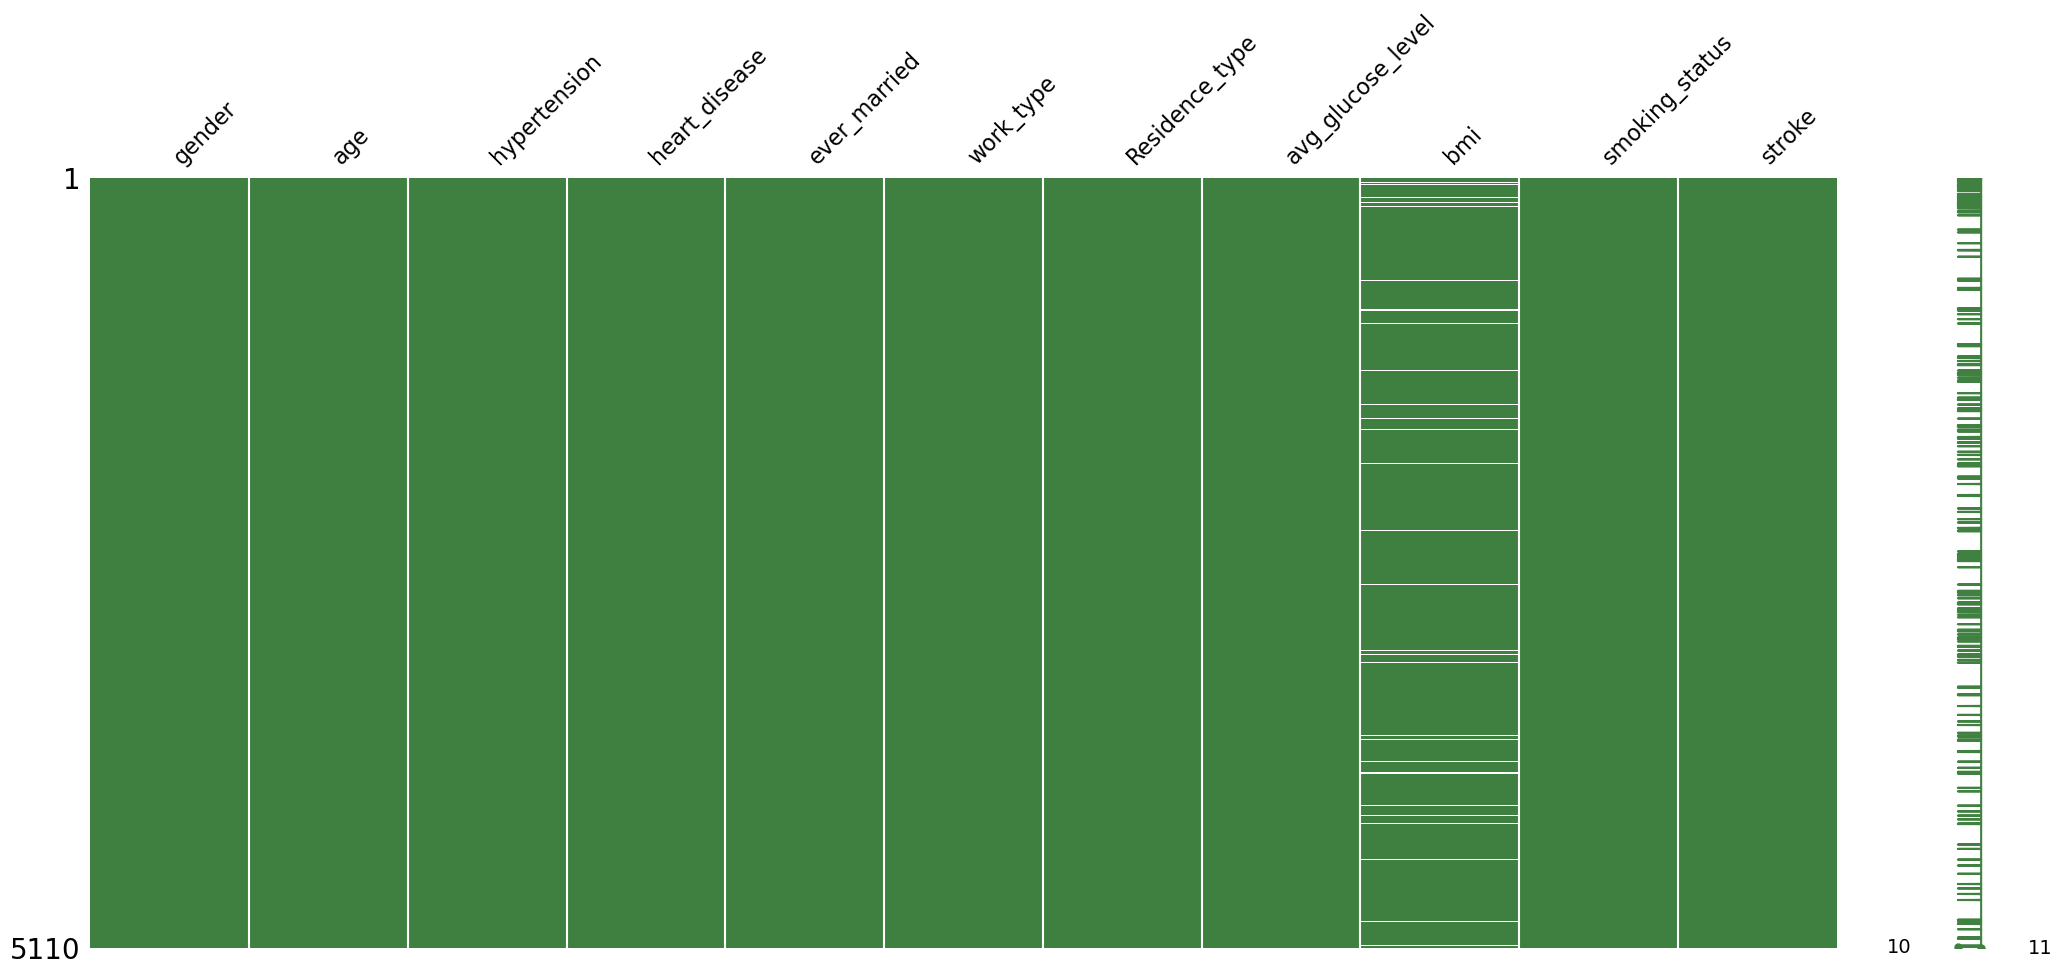

In [18]:
msno.matrix(df, color=(0.25, 0.50, 0.25))  # visualazing missing data
plt.show()  # displaying plot

In [19]:
df[df['bmi'].isna()].shape[0]/df.shape[0] * 100

3.9334637964774952

In [20]:
df = df.dropna() # dropping null values from dataset
df.isna().sum() # checking it got removed or not

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
# function for categorical columns visualisation
def cat_vis(df, var):
    plt.figure(figsize=(18, 10))  # plot size
    sns.set_style('darkgrid')  # setting plot background
    plt.suptitle(f'Distribution of {var} variable',
                 fontsize=18)  # giving title

    plt.subplot(1, 2, 1)  # creating subplots
    ax = sns.countplot(x=df[var], palette='Set2')  # creating countplot
    ax.bar_label(ax.containers[0])  # assignig bar values
    plt.xticks(rotation=30, horizontalalignment="center")

    plt.subplot(1, 2, 2)  # creating suplots
    df[var].value_counts().plot(kind='pie', autopct='%.2f',
                                shadow=True)  # creating pie plot

    plt.show()  # displaying plot

**Outcome variable distribution**
- here our outcome variable is 'stroke' 
- - 0 means False not got any stroke
- - 1 means True got stroke

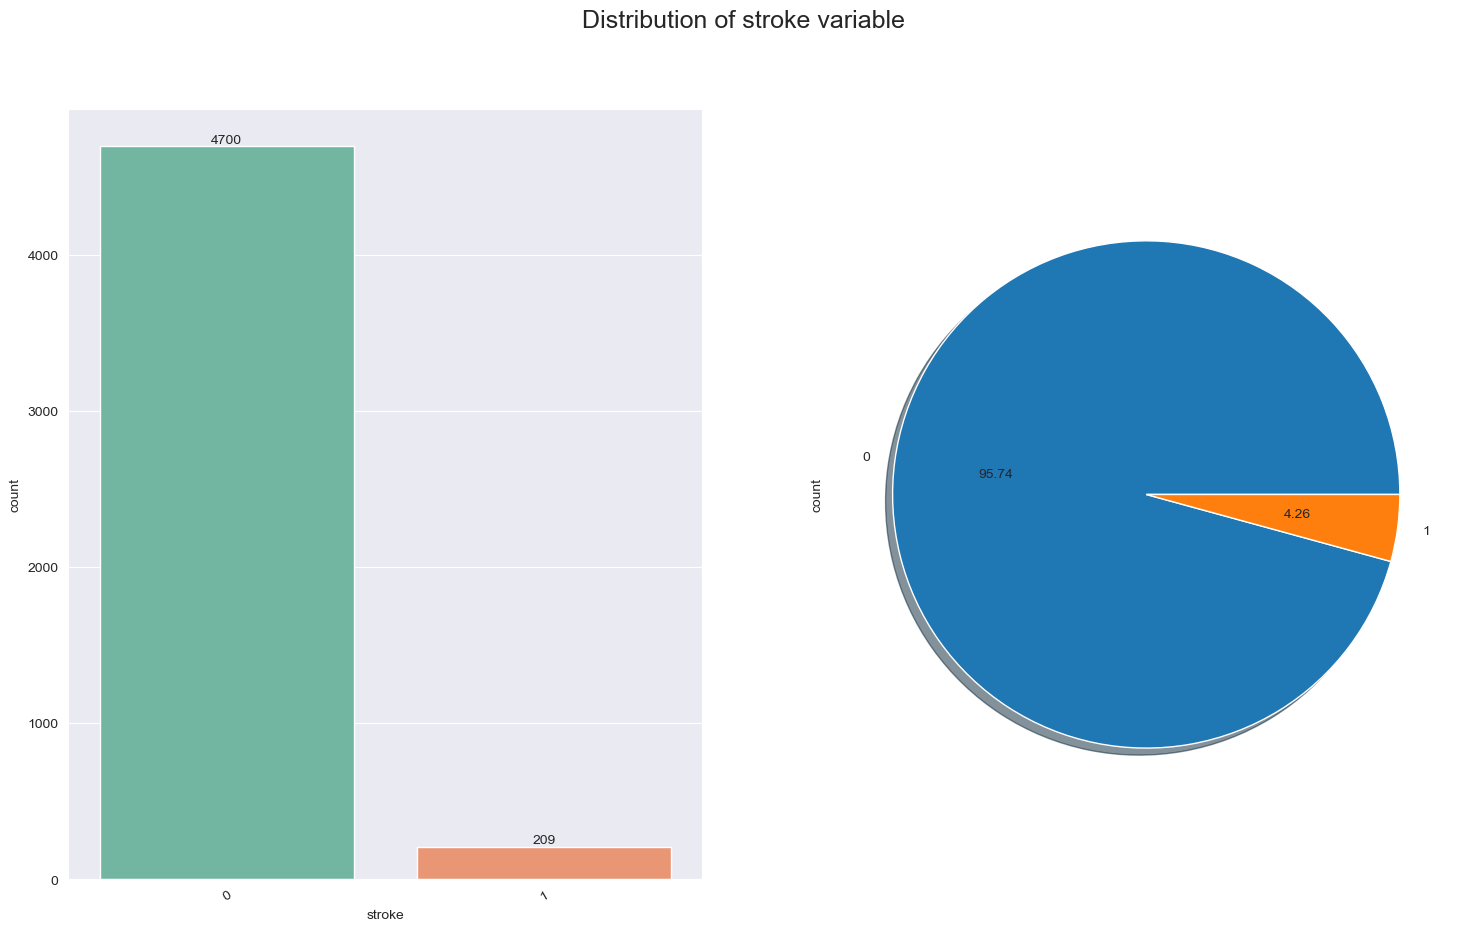

In [22]:
cat_vis(df,'stroke')

- count of outcome varibale i.e stroke in the dataset

### **Qualitative Analysis** 

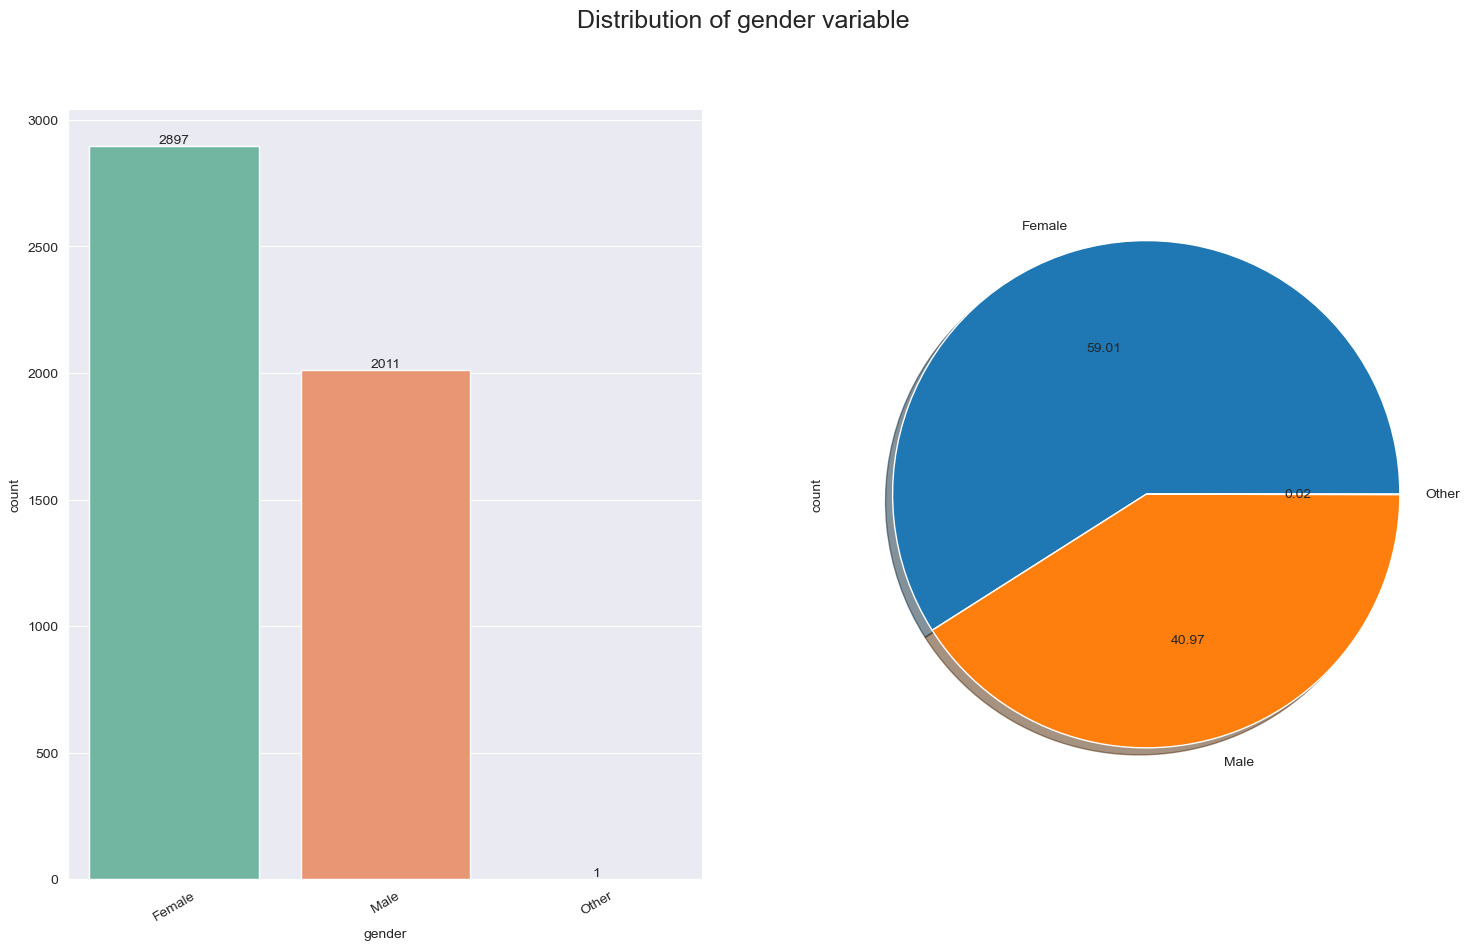

In [23]:
cat_vis(df,'gender')

In [24]:
df[df.gender == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


- there is an extra row with gender as other in the dataset
- removing it as there is only one row with that

In [25]:
df = df.drop(df.index[2970]) 
df.reset_index(inplace=True)
df = df.drop(columns = ['index'])

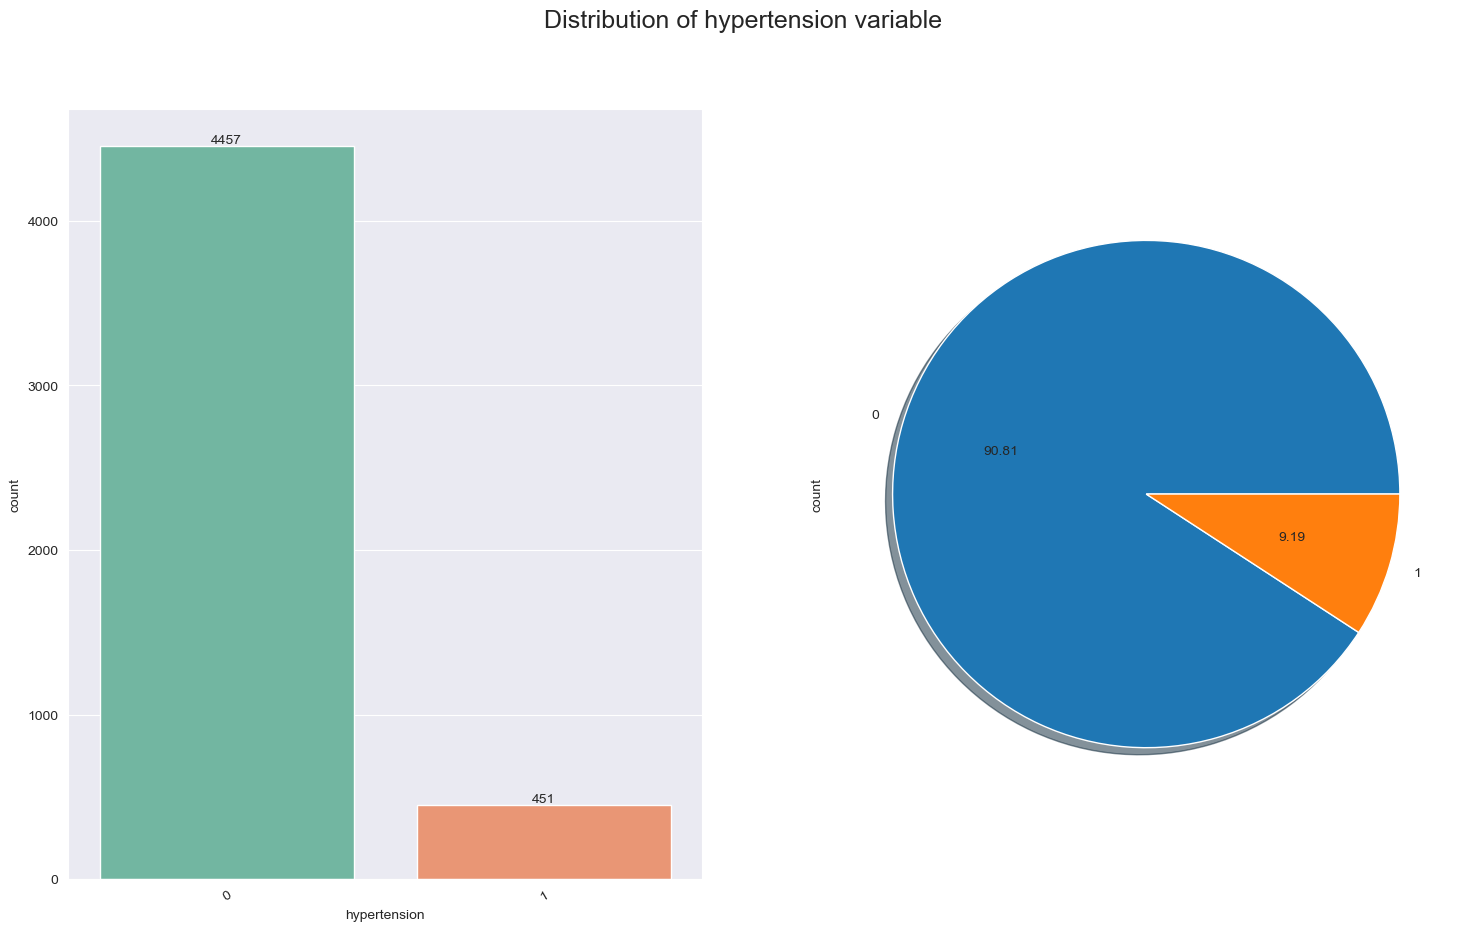

In [26]:
cat_vis(df,'hypertension')

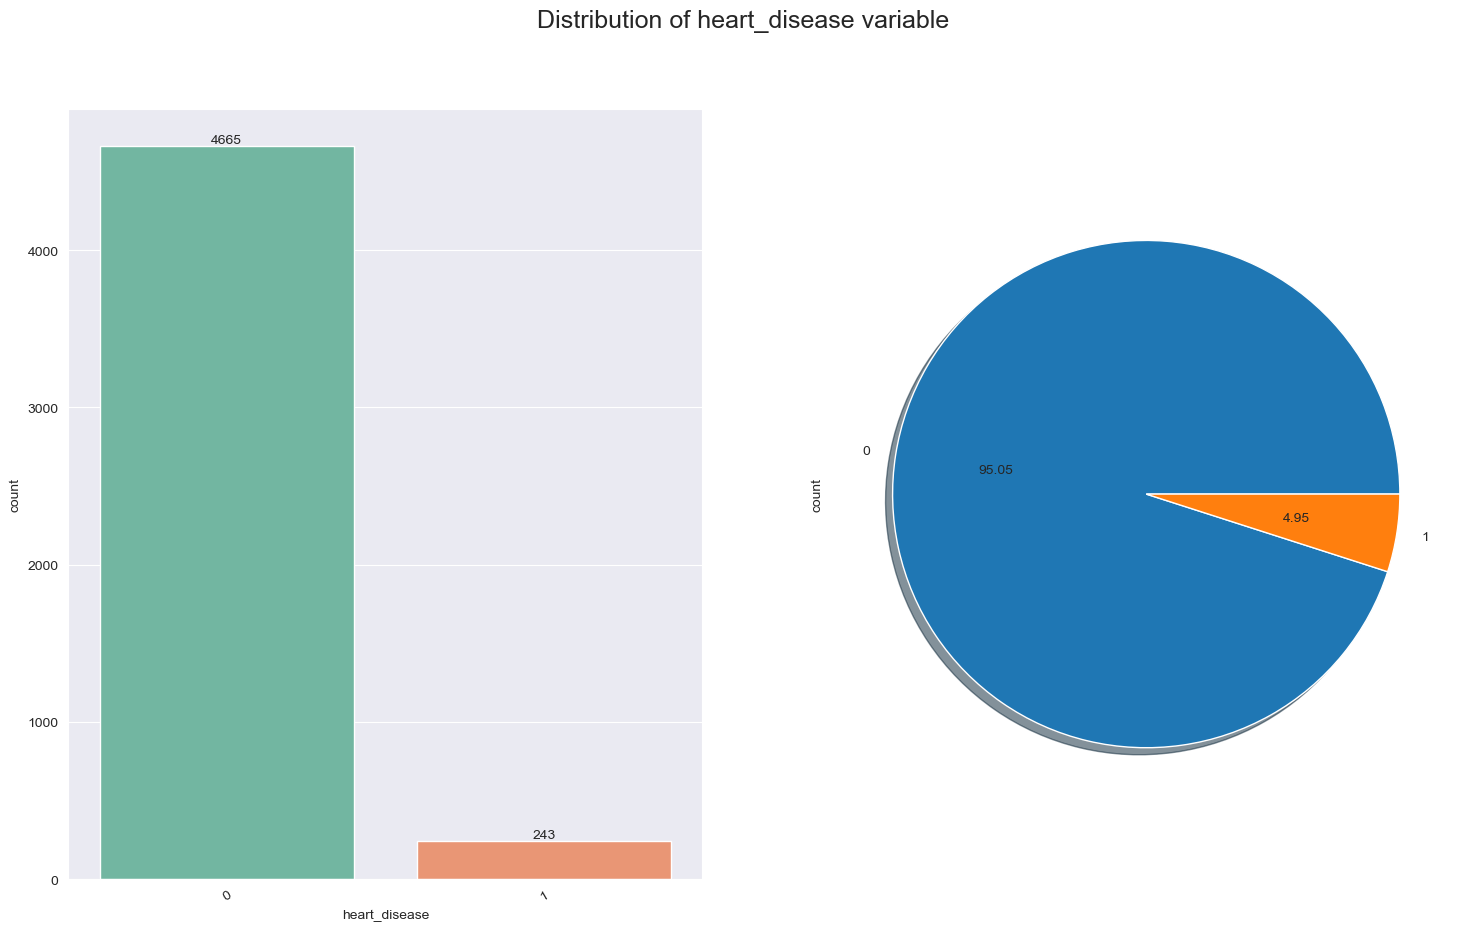

In [27]:
cat_vis(df,'heart_disease')

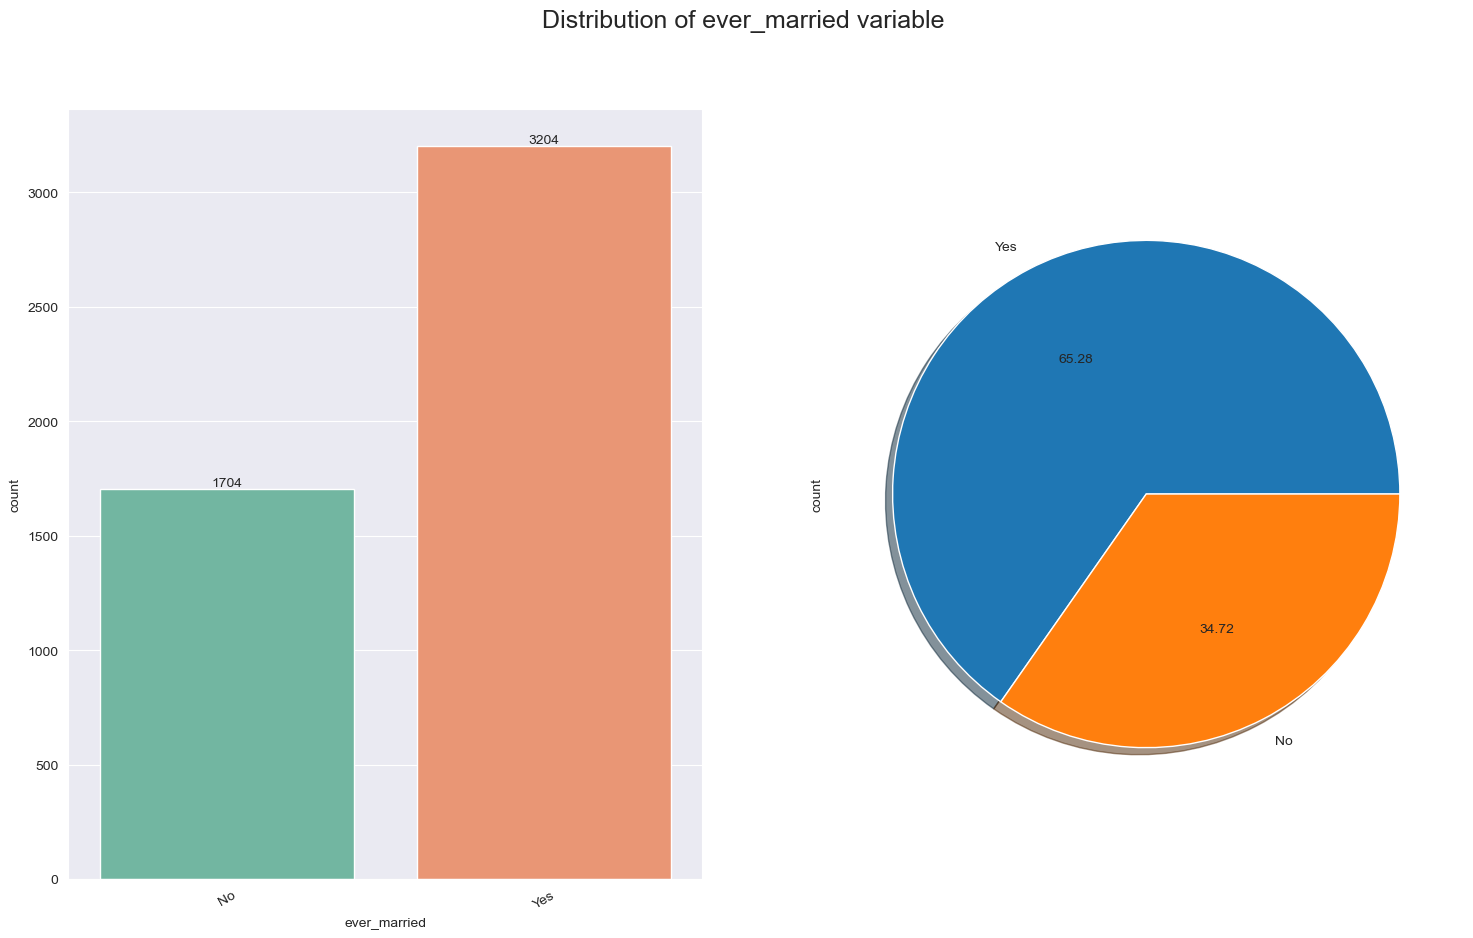

In [28]:
cat_vis(df,'ever_married')

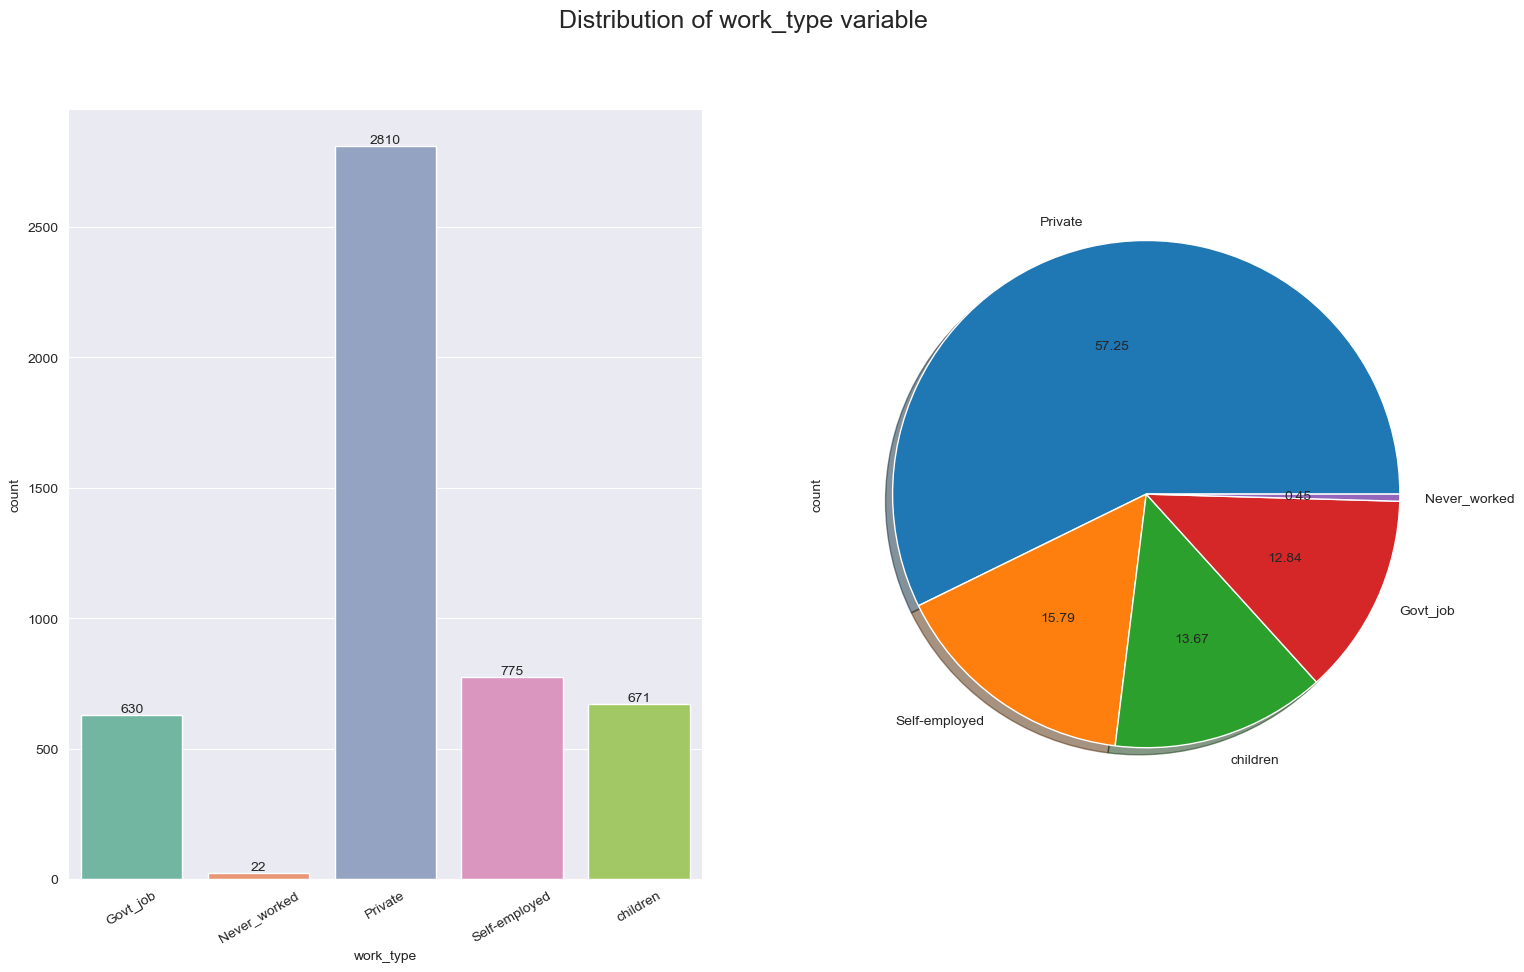

In [29]:
cat_vis(df,'work_type')

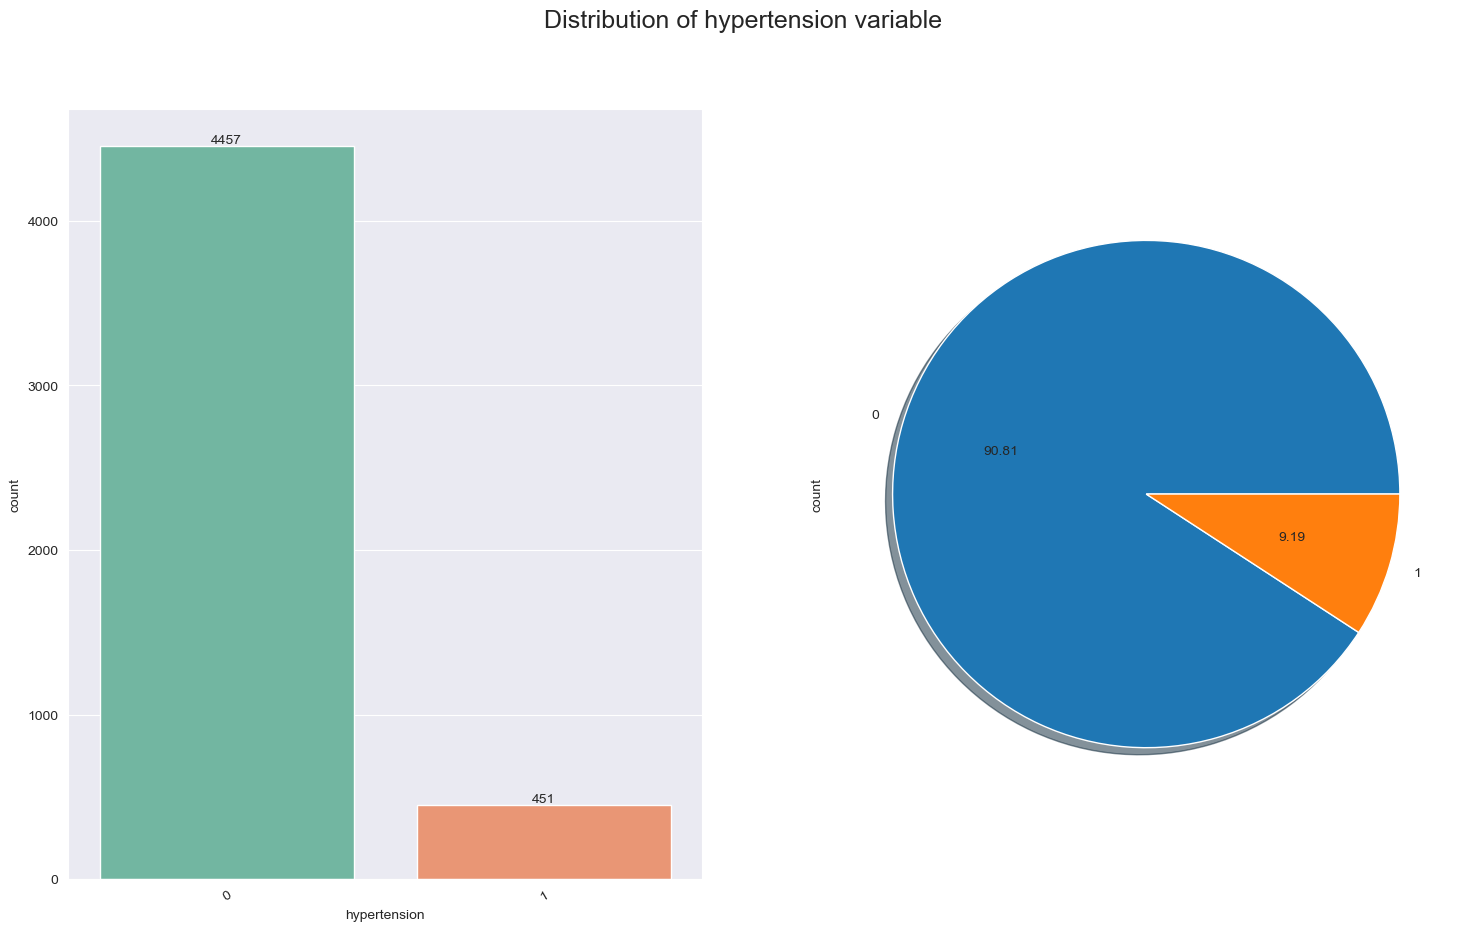

In [30]:
cat_vis(df,'hypertension')

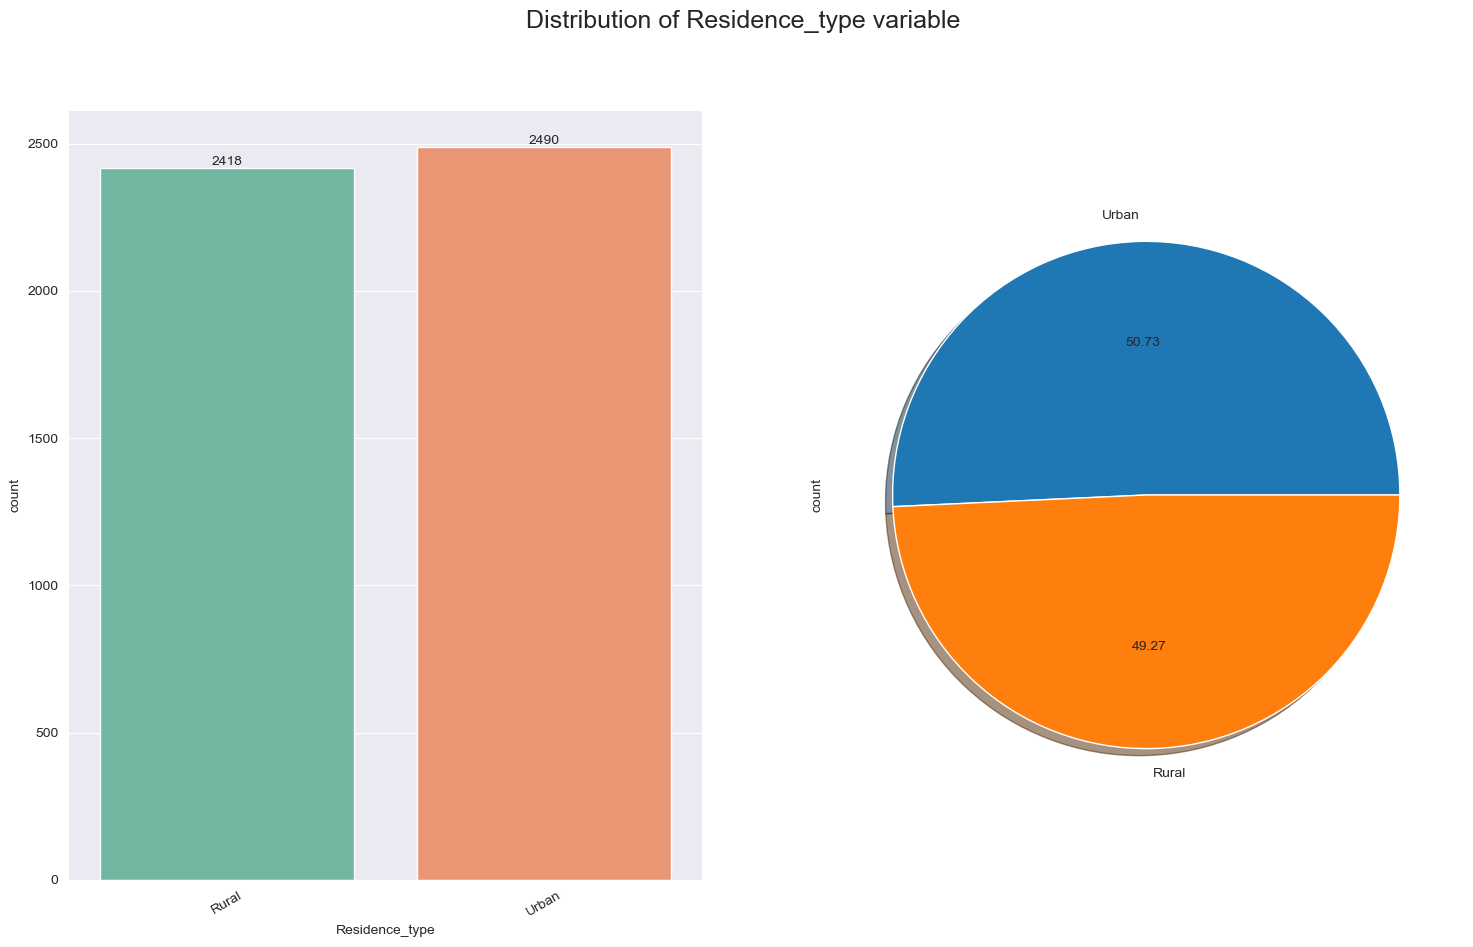

In [31]:
cat_vis(df,'Residence_type')

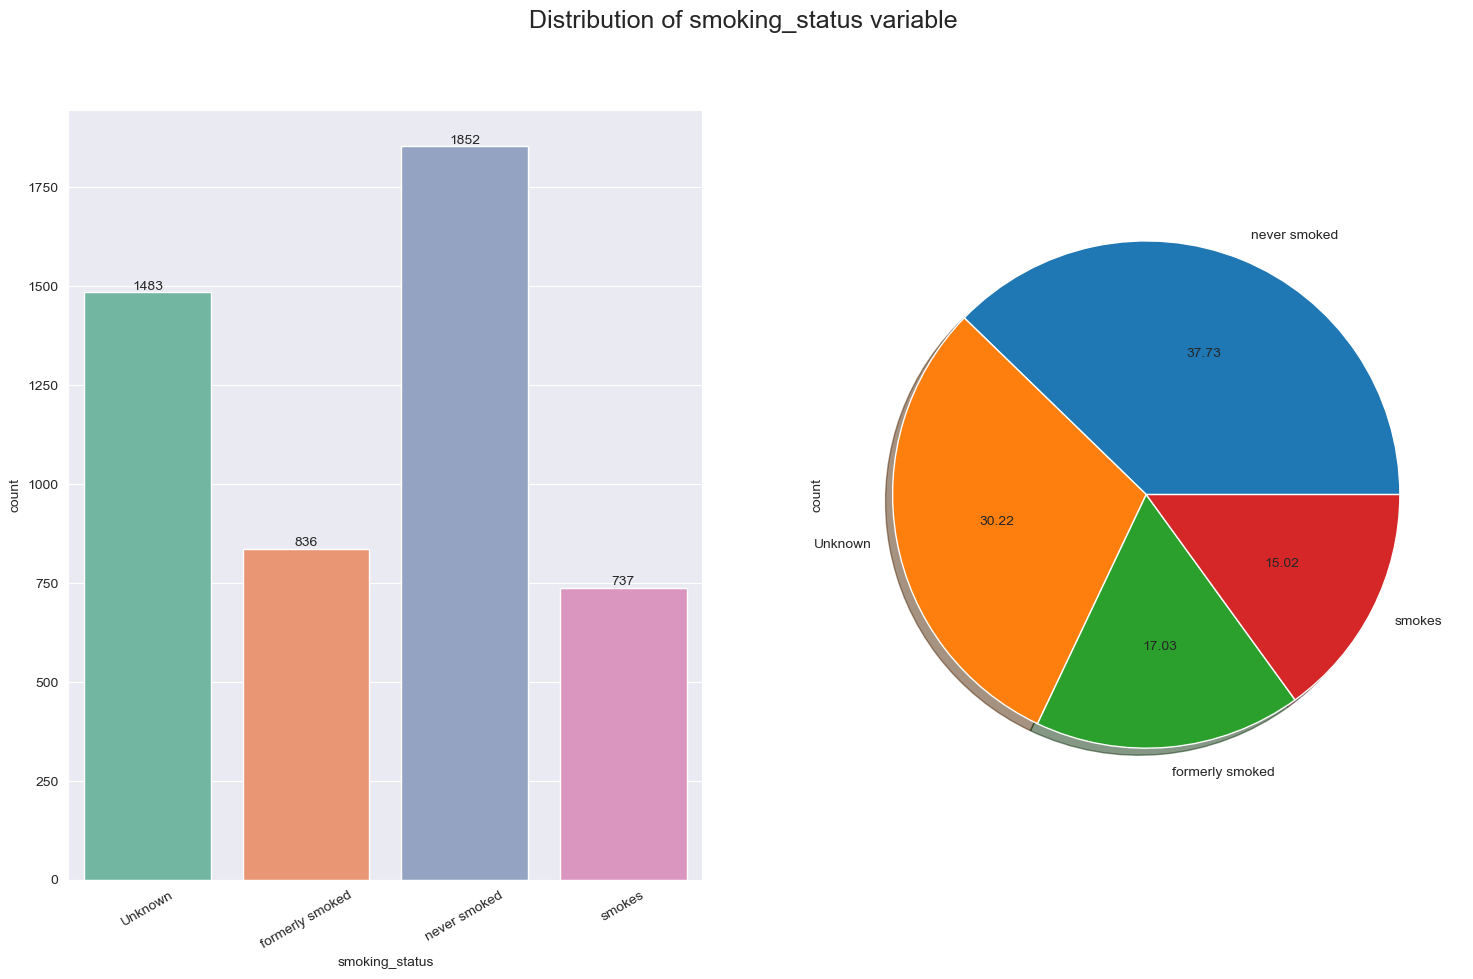

In [32]:
cat_vis(df,'smoking_status')

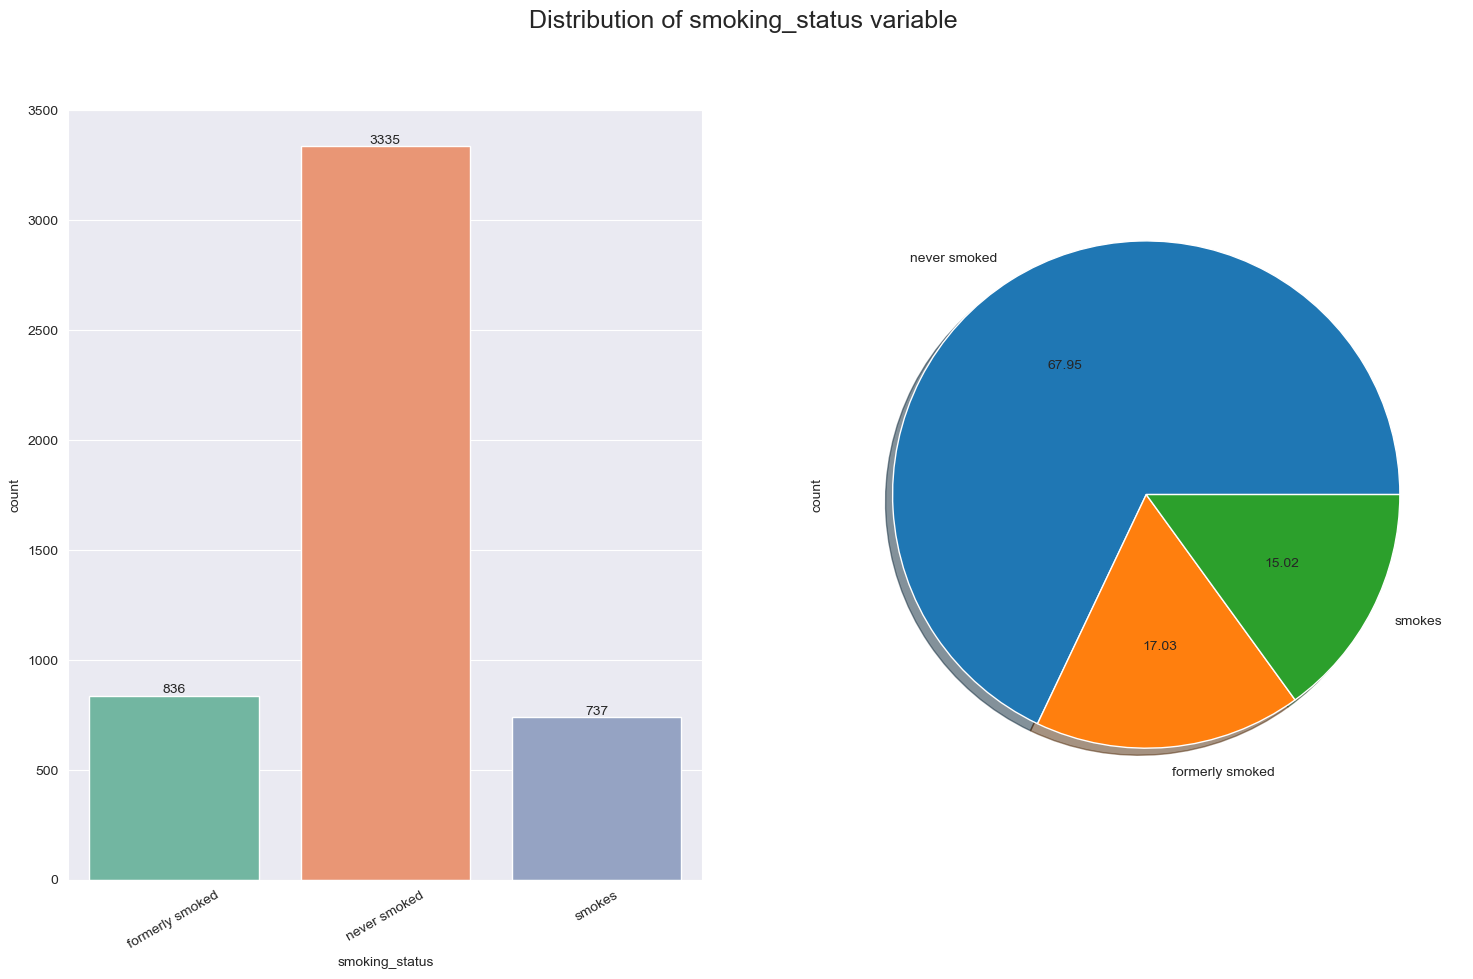

In [33]:
df['smoking_status'].replace({'Unknown':df['smoking_status'].mode()[0]}, inplace=True)
cat_vis(df,'smoking_status')

### **Quantitative Analysis**   

In [34]:
def num_vis(df, var):  # function for numerical columns visualisation
    plt.figure(figsize=(18, 5))  # plot size
    sns.set_style('darkgrid')  # setting background
    plt.suptitle(f'Distribution of {var} variable',
                 fontsize=18)  # setting title

    plt.subplot(1, 2, 1)  # setting subplot
    sns.histplot(df, x=var, kde=True)  # creating histogram plot
    plt.axvline(x=df[var].mean(), color='red', alpha=0.5,
                label='Mean')  # creating mean line
    plt.axvline(x=df[var].median(), color='blue', ls='--',
                alpha=0.5, label='Median')  # creating median line
    plt.legend()  # displaying legend

    plt.subplot(1, 2, 2)  # setting subplot
    sns.boxplot(x=df[var])  # creating boxplot
    plt.show()  # displaying the plots


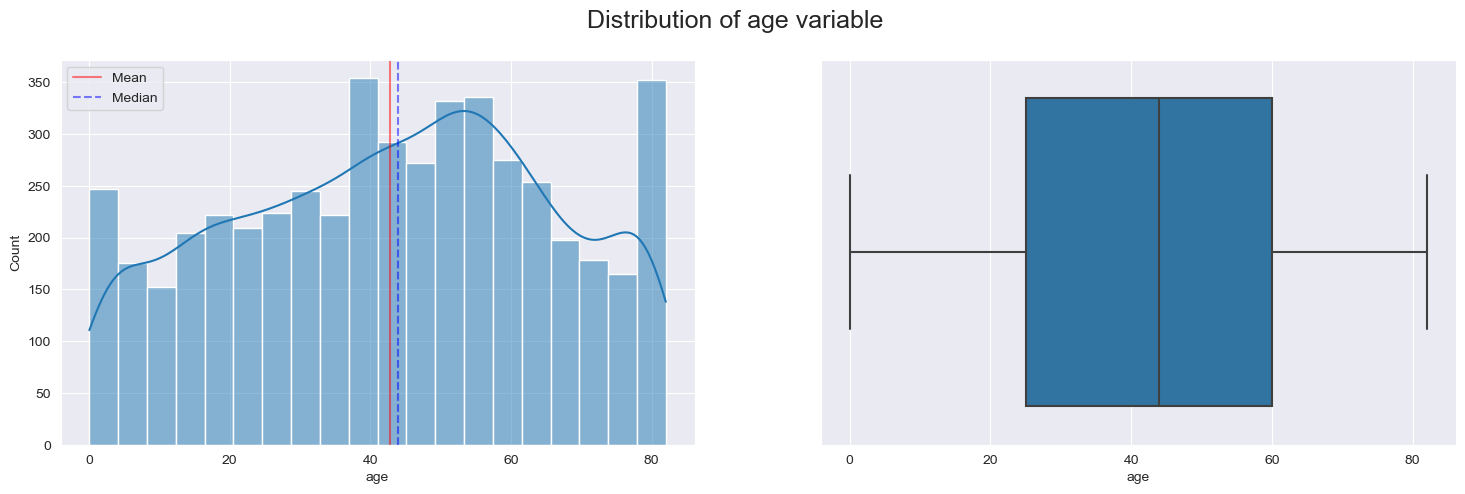

In [35]:
num_vis(df, 'age')

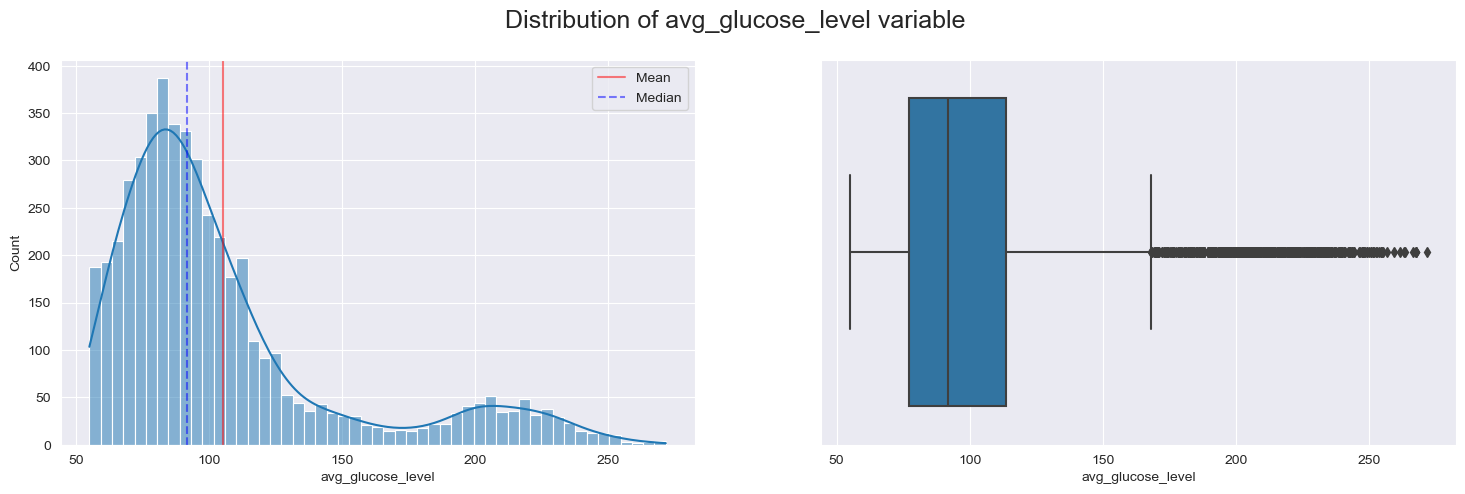

In [36]:
num_vis(df, 'avg_glucose_level')

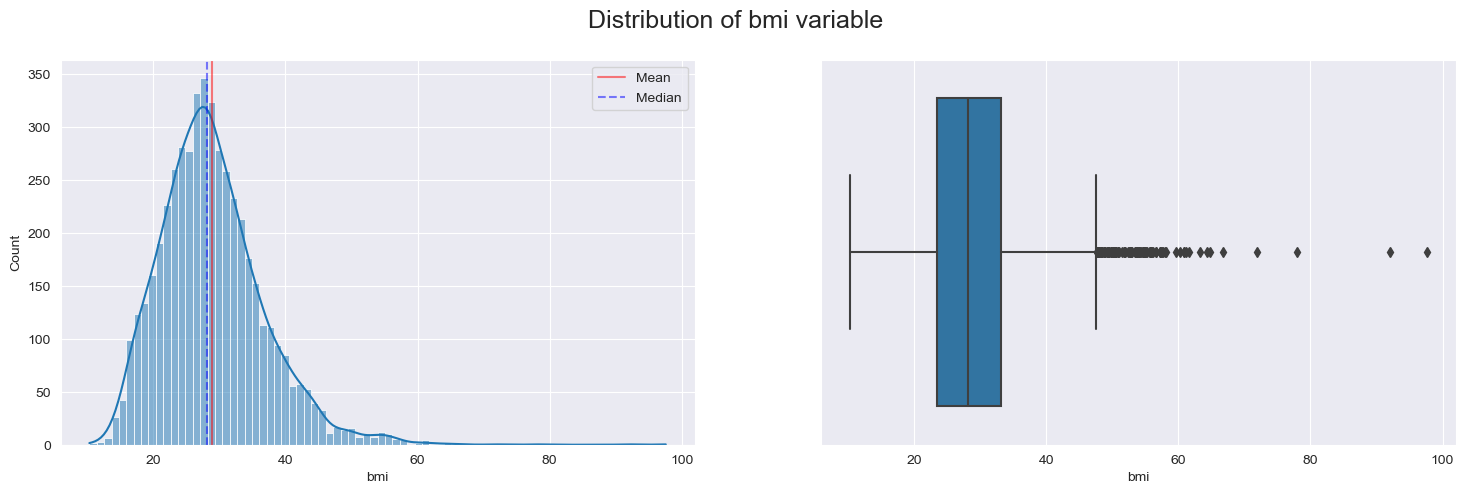

In [37]:
num_vis(df, 'bmi')

In [38]:
lowis, upwis = np.percentile(df.bmi,(25,75))

In [39]:
df['bmi'].describe()

count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

In [40]:
df[(df.bmi < lowis) | (df.bmi > upwis)].shape

(2410, 11)

In [41]:
df[(df.bmi < lowis) | (df.bmi > upwis)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
13,Male,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
4898,Male,9.0,0,0,No,children,Urban,71.88,17.5,never smoked,0
4901,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
4902,Female,18.0,0,0,No,Private,Urban,82.85,46.9,never smoked,0
4903,Female,13.0,0,0,No,children,Rural,103.08,18.6,never smoked,0


**Skewness**

------------ Mean ------------
age                   42.868810
avg_glucose_level    105.297402
bmi                   28.894560
dtype: float64

------------ Median ------------
age                  44.00
avg_glucose_level    91.68
bmi                  28.10
dtype: float64

------------ Skewness ------------



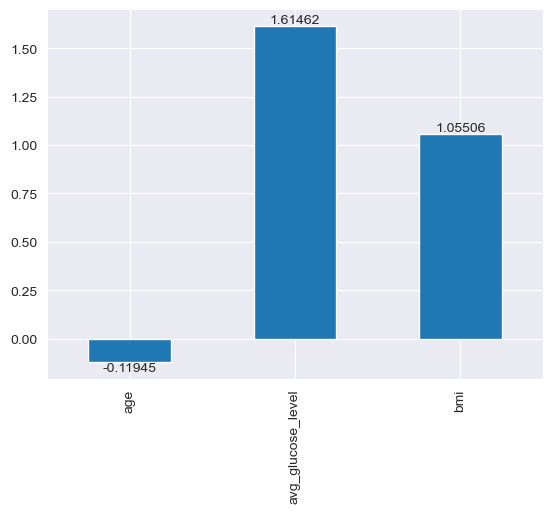

In [42]:
print('------------ Mean ------------')
print(df[num_col].mean())
print()
print('------------ Median ------------')
print(df[num_col].median())
print()
print('------------ Skewness ------------')
ax = df[num_col].skew().plot(kind='bar')
ax.bar_label(ax.containers[0])
print()

In [43]:
glu_log = df.avg_glucose_level.transform('log').to_frame() # log transformation on age
glu_sqrt = df.avg_glucose_level.transform('sqrt').to_frame() # square root transformation on age
glu_cbrt = df.avg_glucose_level.transform('cbrt').to_frame() # cube root transformation on age

In [44]:
def  side_by_side(dataframe): # creating a side by side comparison function
    sns.set_style('darkgrid') # setting background color of plot
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6)) # setting two columns of given sizes
    sns.histplot(data=df,x='avg_glucose_level',bins = 20, kde=True, ax=ax[0], color='r') # config of 1st histogram plot
    ax[0].set_xlabel('avg_glucose_level', fontsize=12) # setting x label
    ax[0].set_ylabel('Count', fontsize=12) # setting y label
    ax[0].set_title('Original Data',fontsize=15) # setting title 
    ax[0].tick_params(labelsize=12)# setting size of graph fonts 


    sns.histplot(data=dataframe, x='avg_glucose_level',bins = 20, kde=True, ax=ax[1], color='b') # config of 2nd histogram plot
    ax[1].set_xlabel('avg_glucose_level', fontsize=12) # setting x label
    ax[1].set_ylabel('Count', fontsize=12) # setting y label
    ax[1].set_title('Transformed Data',fontsize=15) # setting title 
    ax[1].tick_params(labelsize=12)# setting size of graph fonts 
    return plt.show() # viewing plots

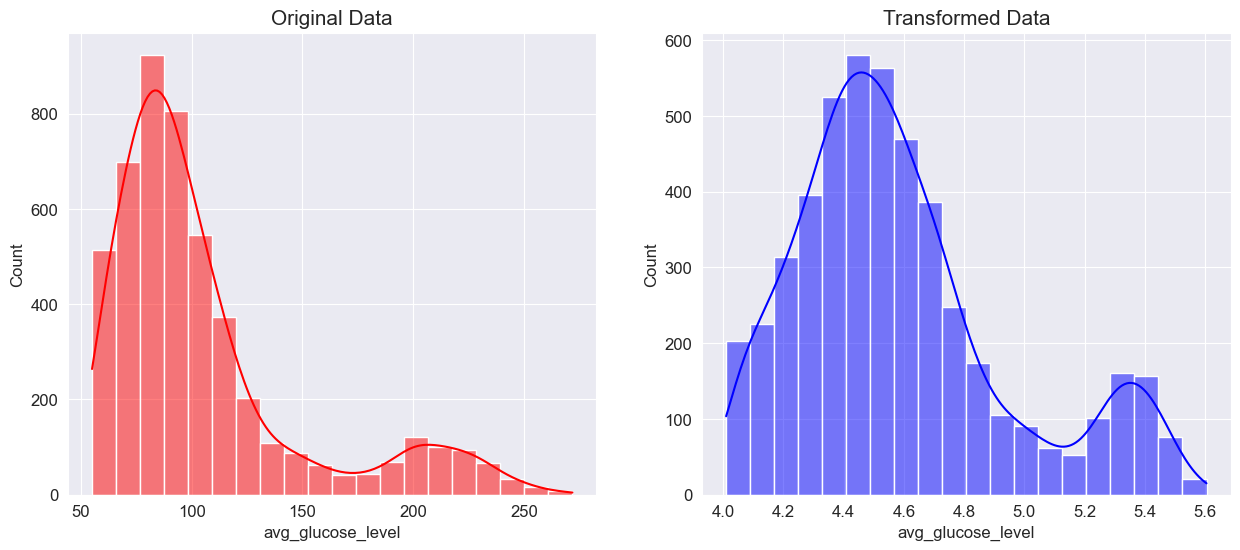

In [45]:
side_by_side(glu_log) # calling log transformed ag

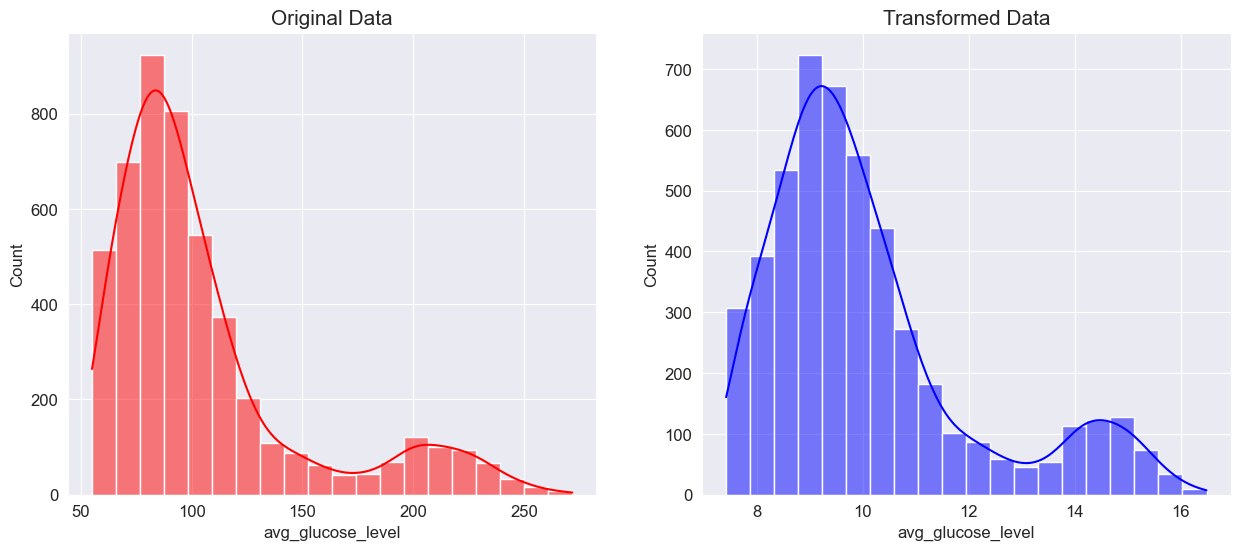

In [46]:
side_by_side(glu_sqrt) # calling log transformed ag

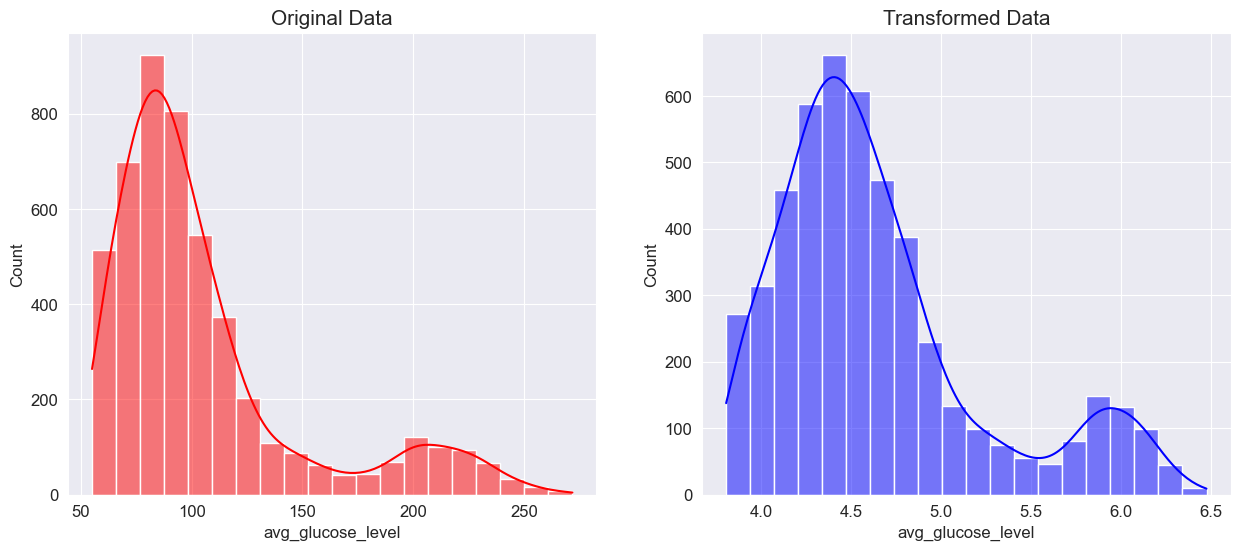

In [47]:
side_by_side(glu_cbrt) # calling log transformed ag

In [48]:
print('Original avg_glucose_level                :',round(df.avg_glucose_level.skew(),2))
print('Log Transformed avg_glucose_level         :',round(glu_log.avg_glucose_level.skew(),2))
print('Square Root avg_glucose_level Age         :',round(glu_sqrt.avg_glucose_level.skew(),2))
print('Cube Root avg_glucose_level Age           :',round(glu_cbrt.avg_glucose_level.skew(),2))

Original avg_glucose_level                : 1.61
Log Transformed avg_glucose_level         : 0.89
Square Root avg_glucose_level Age         : 1.27
Cube Root avg_glucose_level Age           : 1.15


**Outliers Detection**

In [49]:
def outliers(variable): # creating function for finding outliers
    Q1,Q3 = np.percentile(df[variable],(25,75)) # assigning 25 and 75 percentile
    IQR = Q3 - Q1 # calculating iqr
    upper_limit = Q3 + 1.5 * IQR # calculating upper whisker
    lower_limit = Q1 - 1.5 * IQR # calculating lower whisker
    out_data = df[(df[variable] < lower_limit) | (df[variable] > upper_limit)] # assigning outliers data
    print(f'Outliers in {variable}: ', round(out_data.shape[0]/df.shape[0]*100,2),'%') # printing outliers %

In [50]:
outliers('age')
outliers('avg_glucose_level')
outliers('bmi')

Outliers in age:  0.0 %
Outliers in avg_glucose_level:  11.59 %
Outliers in bmi:  2.24 %


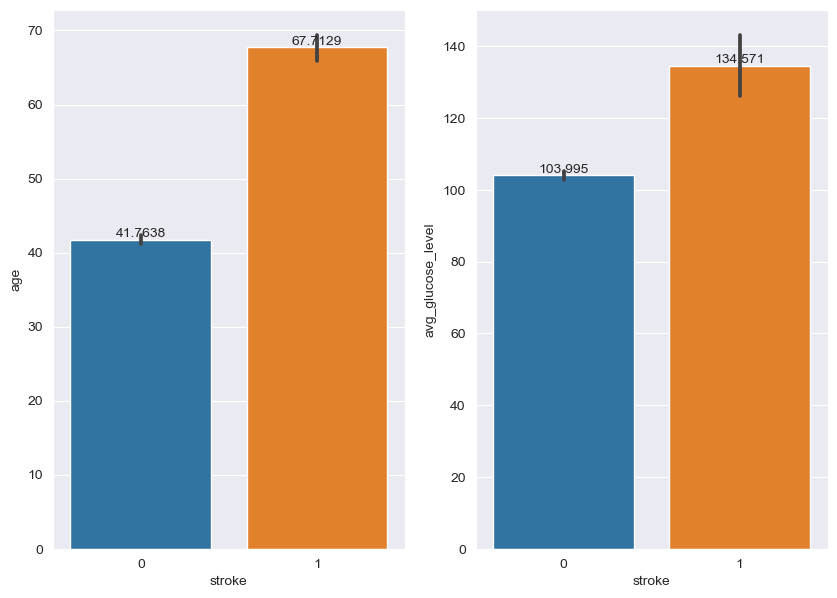

In [51]:
plt.figure(figsize=(10,7)) # plot size

plt.subplot(1,2,1) # setting subplot
ax =sns.barplot(y='age', x='stroke', data=df) # creating bar plot
ax.bar_label(ax.containers[0])

plt.subplot(1,2,2) # setting subplot
ax =sns.barplot(y='avg_glucose_level', x='stroke', data=df) # creating bar plot
ax.bar_label(ax.containers[0]) # assignig bar values 
plt.show() # displaying the plots

In [52]:
plt.figure(figsize=(13,6)) # plot size
sns.heatmap(df.corr(method = 'spearman').round(2), annot=True, vmin=-1, vmax=1)
plt.show() # displaying the plots

ValueError: could not convert string to float: 'Male'

<Figure size 1300x600 with 0 Axes>

<AxesSubplot:>

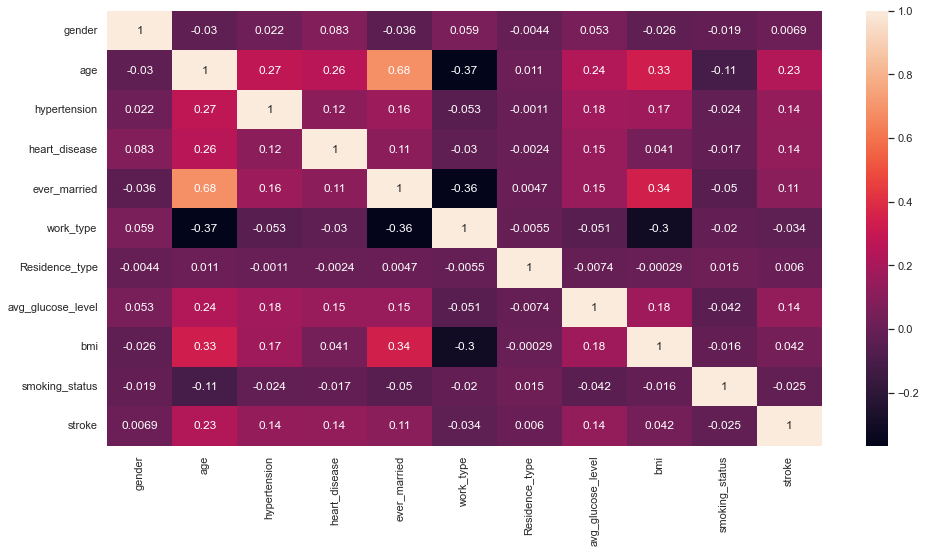

In [ ]:
df1 = df.copy(deep=True)

# converting cat values to numerical codes for heatmap
for i in cat_col:
    df1[i] =df1[i].astype('category').cat.codes
    
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df1.corr(), annot = True, fmt='.2g')

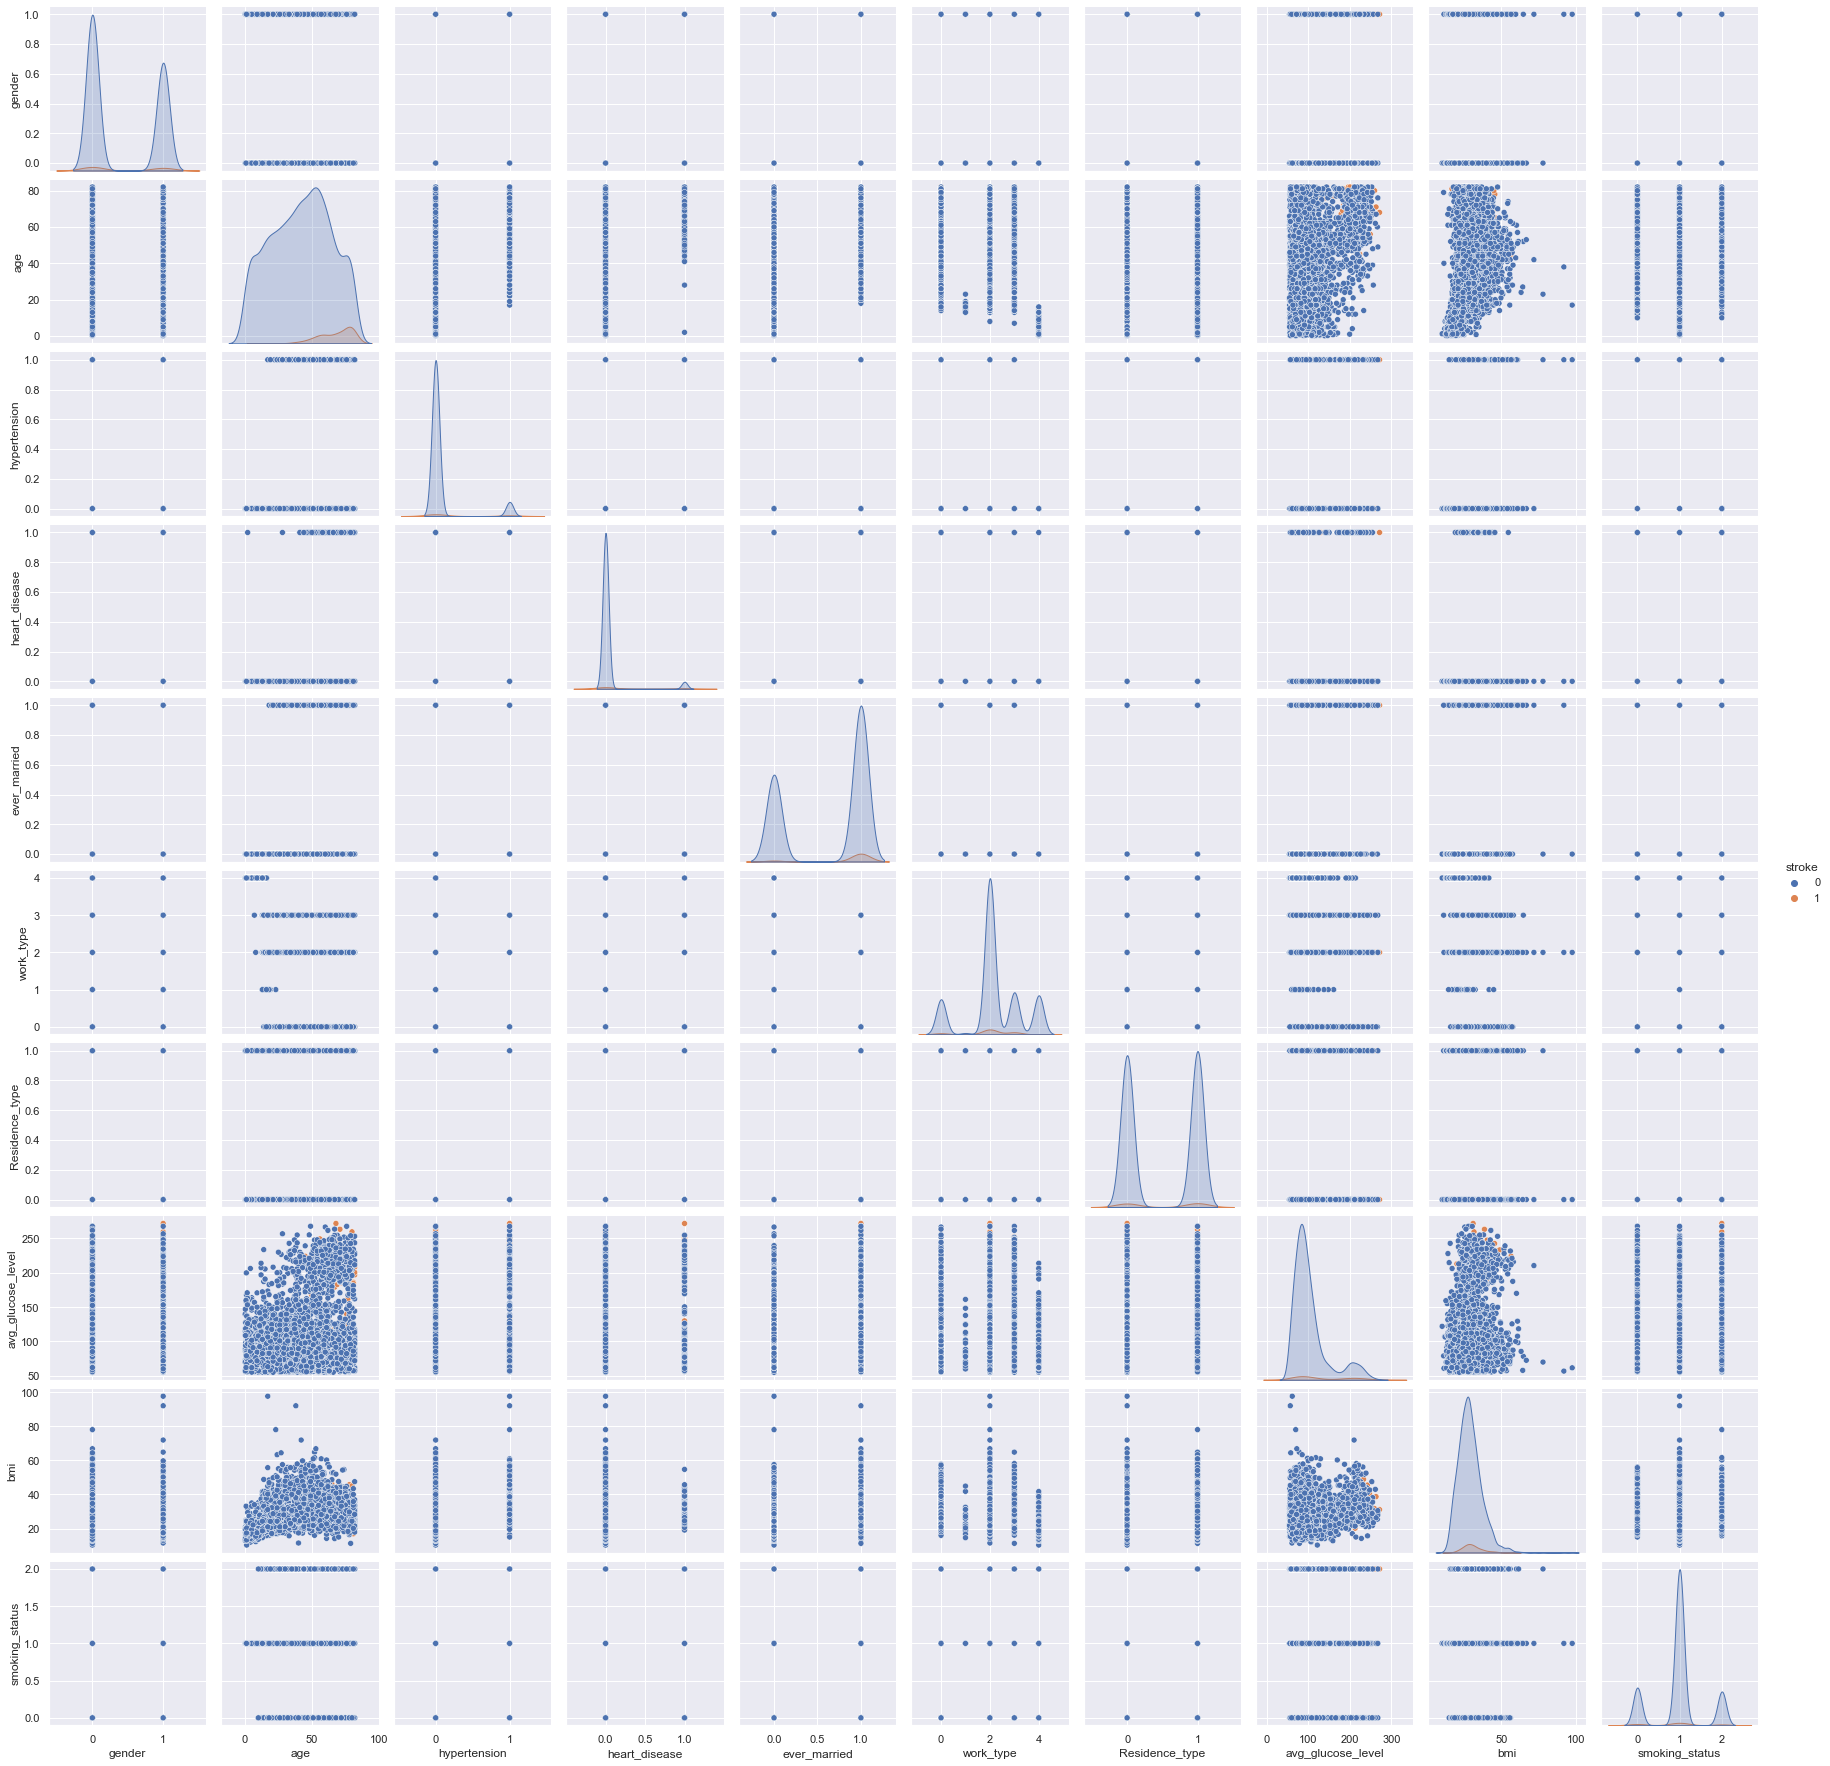

In [ ]:
sns.pairplot(data=df1, hue='stroke') # hue bring colours to species
plt.show() # displaying the plots

In [ ]:
X = df.drop(['stroke'],axis=1,inplace=False) # selecting all variables except outcome
y = df['stroke'] # selecting outcome variable

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


**Machine Learning**

In [ ]:
from sklearn import preprocessing
def label_encoder(var):
    le = preprocessing.LabelEncoder()
    df[var] = le.fit_transform(df[var])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)
    
label_encoder('gender')
label_encoder('ever_married')
label_encoder('work_type')
label_encoder('Residence_type')
label_encoder('smoking_status')

{'Female': 0, 'Male': 1}
{'No': 0, 'Yes': 1}
{'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
{'Rural': 0, 'Urban': 1}
{'formerly smoked': 0, 'never smoked': 1, 'smokes': 2}


In [ ]:
df # viewing data frame 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,0,1
1,1,80.0,0,1,1,2,0,105.92,32.5,1,1
2,0,49.0,0,0,1,2,1,171.23,34.4,2,1
3,0,79.0,1,0,1,3,0,174.12,24.0,1,1
4,1,81.0,0,0,1,2,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4903,0,13.0,0,0,0,4,0,103.08,18.6,1,0
4904,0,81.0,0,0,1,3,1,125.20,40.0,1,0
4905,0,35.0,0,0,1,3,0,82.99,30.6,1,0
4906,1,51.0,0,0,1,2,0,166.29,25.6,0,0


**Models with their results**

In [ ]:
X = df.drop(['stroke'],axis=1,inplace=False) # selecting all variables except outcome
y = df['stroke'] # selecting outcome variable

In [ ]:
from sklearn.preprocessing import StandardScaler # importing Standatd Scaler 
sc = StandardScaler() # creating Standatd Scaler object
x = sc.fit_transform(X) # transorming features and standardizing them

In [ ]:
from sklearn.model_selection import train_test_split # importing spliting module
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # spliting train and test

In [ ]:
# importing evaluation matrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

**1. Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression # importing logistic regression 
reg = LogisticRegression() # creating logistic regression object
reg.fit(x_train,y_train) # fiiting training module

LogisticRegression()

In [ ]:
y_pred=reg.predict(x_test) # predicting in test split
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982

Confusion Matrix:
 [[939   0]
 [ 43   0]]
Training Score:
 95.79724910850739
Mean Squared Error:
 0.04378818737270876
R2 score is:
 -0.045793397231096655


In [ ]:
reg_score = round(accuracy_score(y_test,y_pred)*100,2) # getting score
print(reg_score) # printing score

95.62


**2. Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # importing decision tree
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')  # creating decision tree object
dtree.fit(x_train,y_train) # fiiting training module

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [ ]:
y_pred=dtree.predict(x_test) # predicting in test split
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.33      0.05      0.08        43

    accuracy                           0.95       982
   macro avg       0.65      0.52      0.53       982
weighted avg       0.93      0.95      0.94       982

Confusion Matrix:
 [[935   4]
 [ 41   2]]
Training Score:
 96.10290371879776
Mean Squared Error:
 0.045824847250509164
R2 score is:
 -0.09443495059068252


In [ ]:
dt_score = round(accuracy_score(y_test,y_pred)*100,2) # getting score
print(dt_score) # printing score

95.42


**3. Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier # importing random forest
rfc=RandomForestClassifier()  # creating random forest object
rfc.fit(x_train,y_train) # fiiting training module

RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(x_test) # predicting in test split
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982

Confusion Matrix:
 [[939   0]
 [ 43   0]]
Training Score:
 99.9745287824758
Mean Squared Error:
 0.04378818737270876
R2 score is:
 -0.045793397231096655


In [ ]:
rf_score = round(accuracy_score(y_test,y_pred)*100,2) # getting score
print(rf_score) # printing score

95.62


**4. K Neighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # importing k neighbor
knn=KNeighborsClassifier(n_neighbors=10)  # creating k neighbour object
knn.fit(x_train,y_train) # fiiting training module

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred=knn.predict(x_test) # predicting in test split
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982

Confusion Matrix:
 [[938   1]
 [ 43   0]]
Training Score:
 95.77177789098319
Mean Squared Error:
 0.04480651731160896
R2 score is:
 -0.0701141739108897


In [ ]:
knn_score = round(accuracy_score(y_test,y_pred)*100,2) # getting score
print(knn_score) # printing score

95.52


In [ ]:
print('------- Accuracy Table -------')
print()
print('Logistic Regression : ', reg_score)
print()
print('DecisionTree        : ', dt_score)
print()
print('Random Forest       : ', rf_score)
print()
print('K Neighbors         : ', knn_score)
print()
print('------- --------------- ------')

------- Accuracy Table -------

Logistic Regression :  95.62

DecisionTree        :  95.42

Random Forest       :  95.62

K Neighbors         :  95.52

------- --------------- ------
